In [2]:
library("ggplot2")
library("directlabels")
library("ggrepel")

In [16]:
cwd = getwd()
data = read.csv(file=sprintf("%s/data/python_entropy_analysis/entropy_correlation_data.csv", cwd))
data_df = data.frame(data)

In [17]:
data_df

Network,A.entropy,B.entropy,r
Temporo-Limbic,0.82,0.754,0.62
Fronto-Striatal,0.69,0.818,0.62
Pulvinar (Thal.),0.68,0.816,0.54
MDN (Thal.),0.76,0.816,0.41
Ventral Attention,0.85,0.908,0.52
Auditory,0.80,0.593,0.52
Medial Visual,0.56,0.590,0.48
Cognitive Control,0.76,0.903,0.43
Salience,0.86,0.920,0.42
R. Cent. Executive,0.57,0.921,0.39


[1] "Cook threshold: 0.307692 "

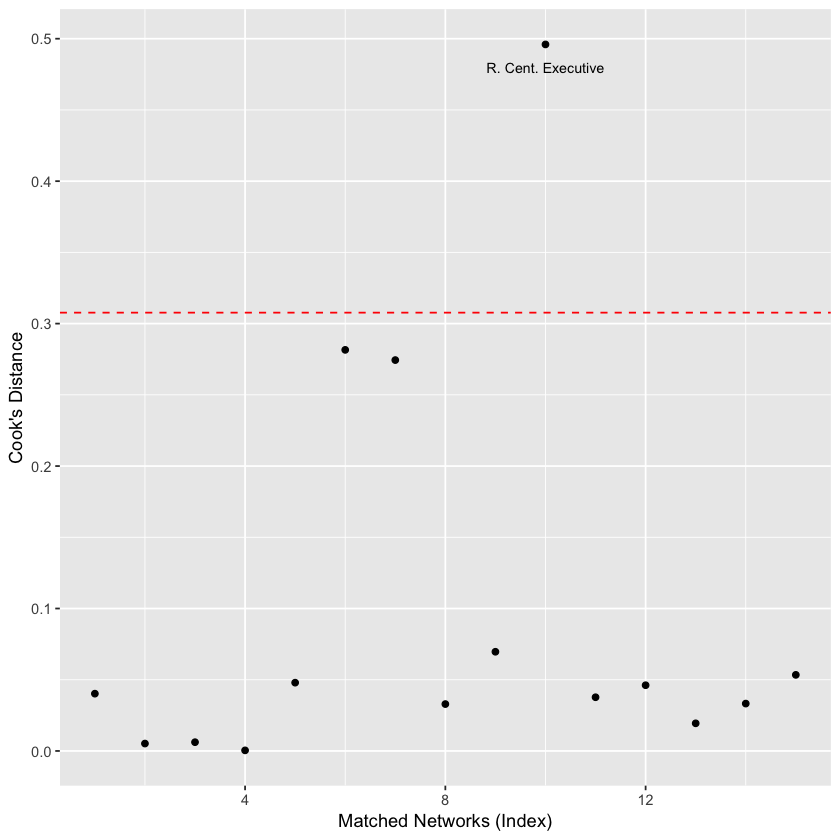

In [30]:
# create cook's plot
lm = lm(data_df$B.entropy~data_df$A.entropy)

#Y~X (Alteration Entropy is Dependent Variable)
fit <- lm(data_df$B.entropy~data_df$A.entropy)

#identify D values > 4/(n-k-1) 
cutoff <- 4/((15 - 1 - 1)) 

sprintf("Cook threshold: %f ", cutoff)

data_df$cd<-cooks.distance(fit)
data_df$index<-1:15

p = ggplot(data_df,aes(index,cd)) +
  geom_point() +
  geom_hline(yintercept=cutoff, linetype="dashed", color = "red") +
  xlab("Matched Networks (Index)") +
  ylab("Cook's Distance") + 
  annotate("text", label="R. Cent. Executive", x=10, y=0.48, size=3) 

p

ggsave(sprintf("%s/figures/sup_figure_3.png",cwd), width = 4.5, height = 4, units = "in", dpi = 500)

#Data Frame with r. cent. executive removed
new_df <- data_df[-c(10), ]
lm = lm(new_df$B.entropy~new_df$A.entropy)



[1] "P-Values of Coefficients"


(Intercept) new_df$A.entropy 
      0.11245091       0.02528129

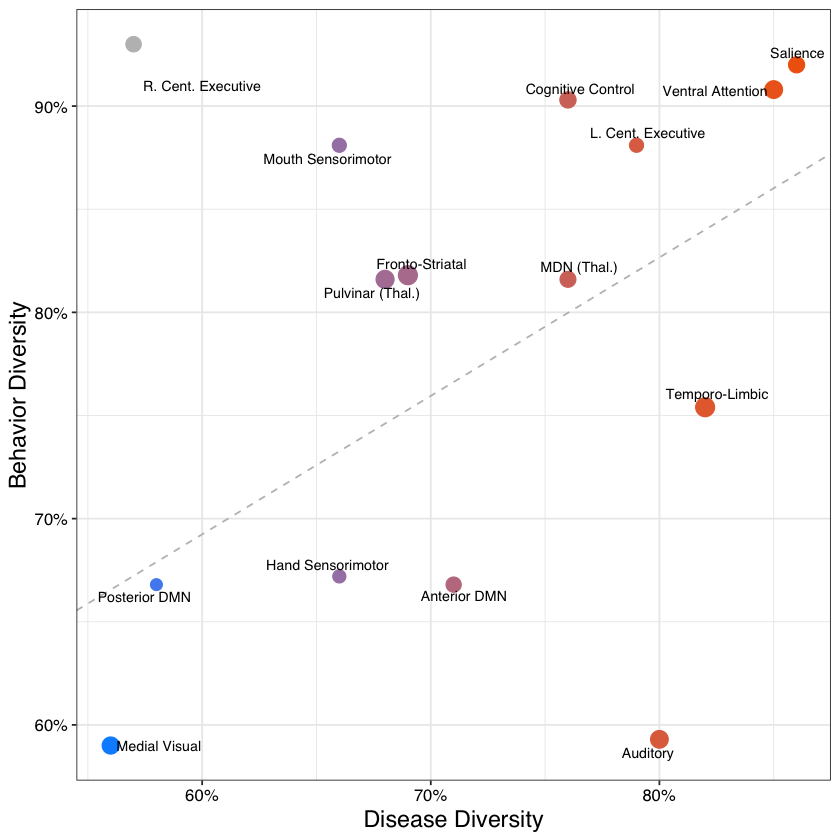

In [26]:
# create linear model (without r cent executive network)
new_df <- data_df[-c(10), ]
lm = lm(new_df$B.entropy~new_df$A.entropy)
res <- summary(lm)


# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(new_df, aes(A.entropy,B.entropy))

# plot linear model (without r. cent. exectuive)
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = new_df$r, color = lm$fitted.values), show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=new_df$Network), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("Behavior Diversity") +
    xlab("Disease Diversity") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    annotate("point", x = 0.57, y = 0.93, size = 4, colour = "gray") +
    annotate("text", label="R. Cent. Executive", x=0.6, y=0.91, size=3, family="Helvetica") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica"))
  
p 

ggsave(sprintf("%s/figures/linear_model.png",cwd), width = 4.5, height = 4, units = "in", dpi = 500)